## The Percepton 
Using Python Classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array([0., 1., 0., 1.], dtype = np.float32)

`What is the dot after 0` \
`What is a floating pont number?`\
`How do you fo flo`\
`If you don't care about precision and space you can use the 32 bit float`


In [3]:
y = np.array([0,0,0,1], dtype = int)

`The 0 with no decimal means integer`

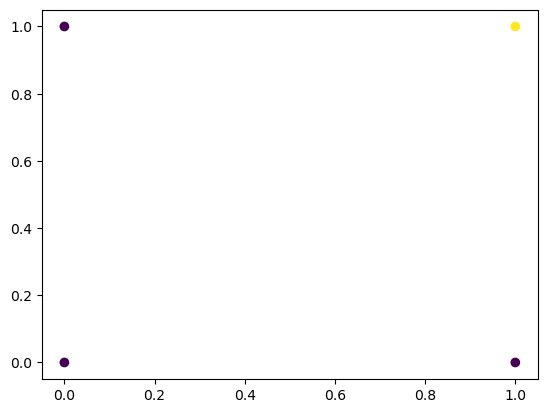

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x1, x2, c=y)

In [5]:
# Repeat the numbers from x1, x2 and y 50 times each
# For example for x1, each element of x1 will be repeated 50 times, so there will be 200 sample points at the end of it
x1 = np.repeat(x1, 50) # This is a vector/aray
x2 = np.repeat(x2, 50) # This is a vector/aray
y = np.repeat(y, 50) # This is a vector/aray

In [6]:
# Add random noise to data points


x1 = x1 + np.random.rand(x1.shape[0])*0.05
x2 = x2 + np.random.rand(x2.shape[0])*0.05

x1

array([8.99737567e-03, 1.54686136e-02, 3.79583288e-02, 3.25338617e-02,
       4.47474163e-02, 1.99630146e-02, 2.01738570e-02, 3.17592230e-02,
       2.65383348e-02, 1.57855217e-02, 3.29036115e-02, 4.67385057e-02,
       4.44784934e-03, 2.35116527e-02, 1.28951775e-02, 1.11275672e-03,
       9.23405507e-03, 2.80115688e-02, 2.14832645e-02, 1.79213985e-03,
       3.82603105e-02, 4.68332193e-02, 1.21608410e-02, 3.96285074e-04,
       2.69997418e-02, 3.65178173e-02, 2.24466704e-03, 3.78760403e-02,
       3.50843417e-02, 2.52252830e-02, 1.82554749e-02, 4.48069423e-02,
       1.65846025e-02, 1.41739333e-02, 4.85797894e-02, 1.42321205e-02,
       2.33956667e-02, 1.76953784e-02, 1.50627712e-02, 4.27984396e-02,
       8.77011208e-03, 3.49870808e-02, 1.75410395e-02, 4.61017867e-02,
       3.64382707e-02, 3.70170280e-04, 6.71831934e-03, 3.13744322e-02,
       4.12257665e-02, 2.58205953e-02, 4.04548053e-02, 3.71320646e-02,
       4.50360235e-02, 1.42657633e-02, 2.43888446e-02, 3.38134256e-02,
      

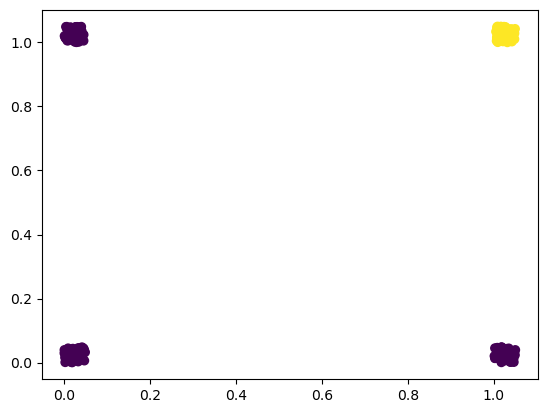

In [7]:
plt.scatter(x1, x2, c = y)

In [8]:
# Combine x1 and x2
X = np.column_stack((x1, x2))

In [9]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (200, 2)
y shape:  (200,)


In [13]:
# Diffusion
# We need to shuffle the index
# Generate indexes from 0 to 199
shuffle_idx = np.arange(y.shape[0])

In [14]:
# Random number generator with a seed
# It is not trully random, but just a pseudo-random
shuffle_rng = np.random.RandomState(42)
shuffle_rng.shuffle(shuffle_idx)

print('Shuffles Indices: ', shuffle_idx)

Shuffle Index:  [ 95  15  30 158 128 115  69 170 174  45  66 182 165  78 186 177  56 152
  82  68 124  16 148  93  65  60  84  67 125 132   9  18  55  75 150 104
 135 137 164  76  79 197  38  24 122 195  29  19 143  86 114 173   5 126
 117  73 140  98 172  96 169  97  31  12  35 119  42 189  90 136  51 127
 162  41 118 113  26 139 100 111   2  77  46 187 191  85 161  36 190  61
  22 141 101  33  11 194 159   6  27 120   4  32 142 145 109 144  10  62
 112 146 166   0 198 153  70 123  64  44 163  28  40 108 155 156  25  23
 184 147  81  39 168  47  94 154  43 138   3 105  53 133 180 178 185  49
  80  34   7 110  91  83 176 181  89   8  13  59 171 131  17  72 175 134
 167 183  63  54 107  50 196  58  48  88  21  57 160 192 129  37 157 193
   1  52 149 130 151 103  99 116  87  74 121 199  20 188  71 106  14  92
 179 102]


In [37]:
X, y = X[shuffle_idx], y[shuffle_idx]
# ???? What does this syntax do

split_point = int(0.7 * X.shape[0])

X_train, X_test = X[shuffle_idx[:split_point]], X[shuffle_idx[split_point:]] 
# ??? What is this colon notation
y_train, y_test = y[shuffle_idx[:split_point]], y[shuffle_idx[split_point:]]

In [48]:
# Normalisation (zero mean, unit variance)
# When axis is 0, you are doing an operation across rows. When doing axis = 1, it is an operation across columns
# We only need the mean and variance for the training data set because is the one used by the machine to learn
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

print('zero mean: ', mu)
print('unit variance(standard deviation): ', sigma)

X_train = (X_train - mu) /sigma
X_test = (X_test - mu) /sigma

zero mean:  [4.83740032e-17 1.98254112e-17]
unit variance(standard deviation):  [1. 1.]


In [65]:
np.zeros((3,1), dtype = float)

array([[0.],
       [0.],
       [0.]])

In [67]:
class Perceptron():
    def _init_(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype = float)
        self.bias = np.zeroes((1,), dtype = float)